In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, InputLayer

from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
model = Sequential()
model.add(InputLayer(input_shape=(28, 28, 1)))
model.add(Conv2D(filters=5, kernel_size=2,strides=1, padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=3, kernel_size=2,strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 5)         25        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 3)         63        
                                                                 
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 32)                75296     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 75,714
Trainable params: 75,714
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [9]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.9914 - accuracy: 0.8041
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2397 - accuracy: 0.9334
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1420 - accuracy: 0.9585
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0996 - accuracy: 0.9703
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0776 - accuracy: 0.9763
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0612 - accuracy: 0.9811
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0537 - accuracy: 0.9832
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0483 - accuracy: 0.9850
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0400 - accuracy: 0.9867
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0366 - accuracy: 0.9883

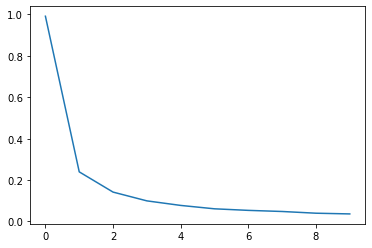

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

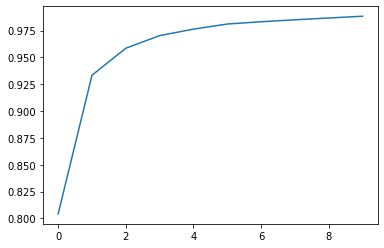

In [11]:
plt.plot(history.history['accuracy'])

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1180 - accuracy: 0.9714


[0.11799217760562897, 0.9714000225067139]

In [17]:
prediction = model.predict(np.expand_dims(X_test[0], 0))
np.argmax(prediction)

1/1 [==============================] - 0s 18ms/step


7

In [18]:
y_test[0]

7